# Домашнее задание 3. Pandas.
## 1. Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv', index_col='row_id')
lectures_df = pd.read_csv('lectures.csv')
questions_df = pd.read_csv('questions.csv')

## 2. Обзор данных
### 2.1. TRAIN.CSV

- **row_id**: `(int64)` Идентификатор строки.
- **timestamp**: `(int64)` Время в миллисекундах между этим взаимодействием пользователя и завершением первого события этого пользователя.
- **user_id**: `(int32)` Идентификатор пользователя.
- **content_id**: `(int16)` Идентификатор взаимодействия пользователя.
- **content_type_id**: `(int8)` 0, если событие представляет собой вопрос, заданный пользователю, и 1, если событие — это просмотр лекции пользователем.
- **task_container_id**: `(int16)` Идентификатор группы вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит объяснения. Все эти три вопроса будут иметь один и тот же `task_container_id`.
- **user_answer**: `(int8)` Ответ пользователя на вопрос, если он был дан. Значение -1 означает `null` (для лекций).
- **answered_correctly**: `(int8)` Указание на то, правильно ли ответил пользователь. Значение -1 означает `null` (для лекций).
- **prior_question_elapsed_time**: `(float32)` Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущей группе вопросов, игнорируя лекции между ними. Является `null` для первой группы вопросов или лекции пользователя. Это время — среднее время, за которое пользователь решил каждый вопрос в предыдущей группе.
- **prior_question_had_explanation**: `(bool)` Указание на то, видел ли пользователь объяснение и правильные ответы после предыдущей группы вопросов, игнорируя лекции между ними. Значение общее для всей группы вопросов и является `null` для первой группы вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста, в котором он не получал обратной связи.


In [4]:
train_df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int64  
 2   content_id                      int64  
 3   content_type_id                 int64  
 4   task_container_id               int64  
 5   user_answer                     int64  
 6   answered_correctly              int64  
 7   prior_question_elapsed_time     float64
 8   prior_question_had_explanation  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 7.5+ GB


,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [6]:
train_df.isnull().sum()

timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

Стобцы датасета содержат числовые значения. В двух столбцах имеются пропуски, но их наличие объясняется в описании датасета.

#### Анализ распределения переменных

In [11]:
# Уникальные пользователи
print(len(train_df['user_id'].unique()))

393656


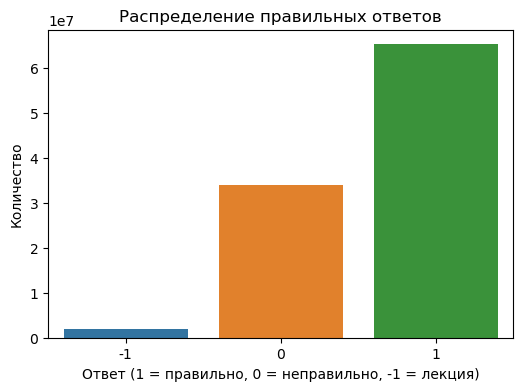

In [12]:
# Распределение ответов
answers = train_df['answered_correctly'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=answers.index, y=answers.values)
plt.title('Распределение правильных ответов')
plt.xlabel('Ответ (1 = правильно, 0 = неправильно, -1 = лекция)')
plt.ylabel('Количество')
plt.show()

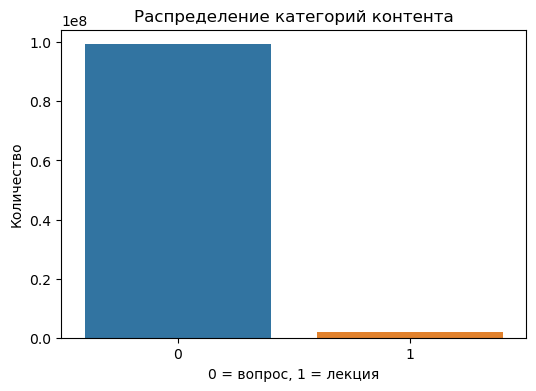

In [13]:
# Распределение категорий контента
content_type = train_df['content_type_id'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=content_type.index, y=content_type.values)
plt.title('Распределение категорий контента')
plt.xlabel('0 = вопрос, 1 = лекция')
plt.ylabel('Количество')
plt.show()

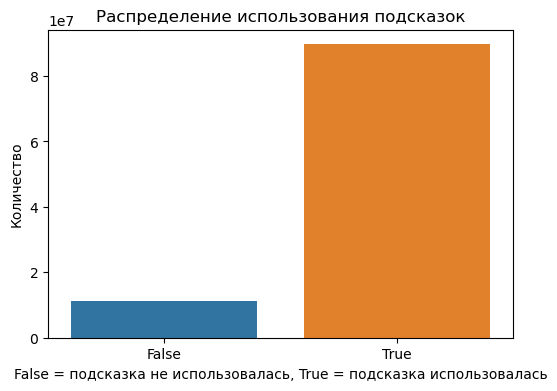

In [14]:
# Распределение использования подсказок
explanations = train_df['prior_question_had_explanation'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=explanations.index, y=explanations.values)
plt.title('Распределение использования подсказок')
plt.xlabel('False = подсказка не использовалась, True = подсказка использовалась')
plt.ylabel('Количество')
plt.show()

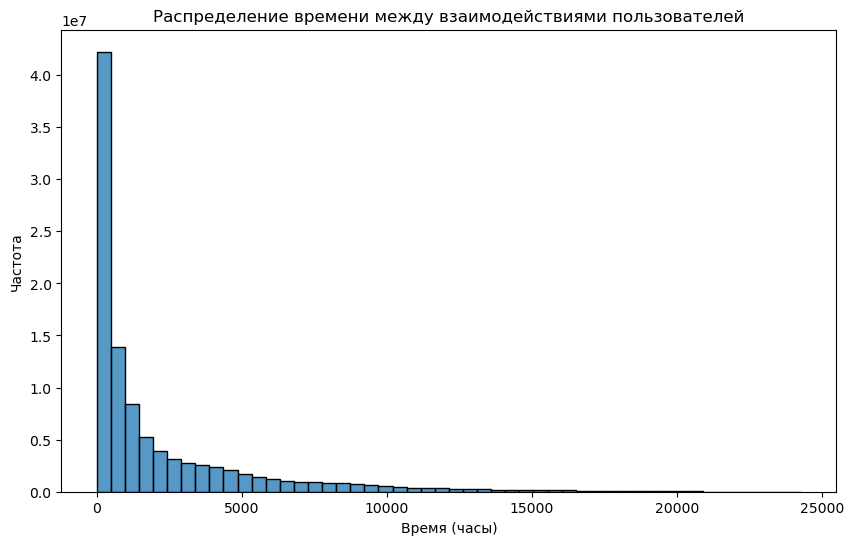

In [15]:
# Распределение времени между взаимодействиями пользователей
plt.figure(figsize=(10, 6))
sns.histplot(train_df['timestamp'] / (1000 * 60 * 60), bins=50)
plt.title('Распределение времени между взаимодействиями пользователей')
plt.xlabel('Время (часы)')
plt.ylabel('Частота')
plt.show()

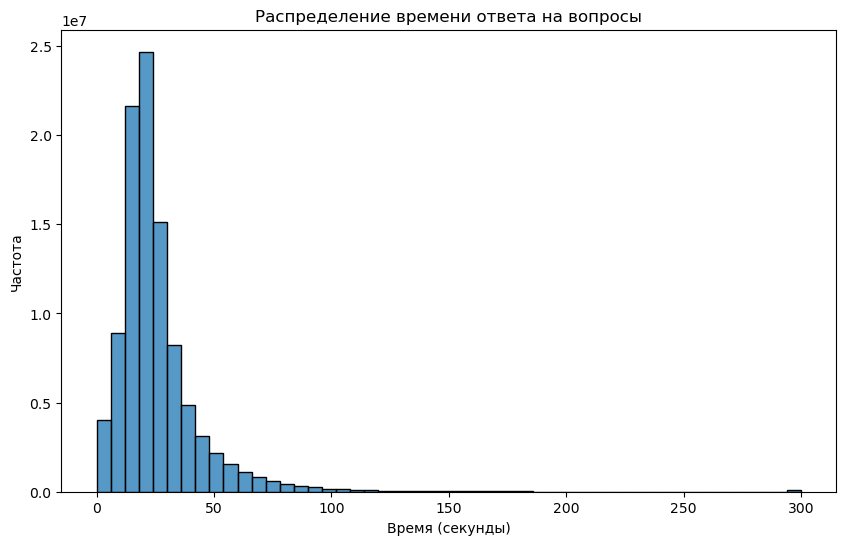

In [16]:
# Распределение времени ответа на вопросы
plt.figure(figsize=(10, 6))
sns.histplot(train_df['prior_question_elapsed_time'].dropna() / 1000, bins=50)
plt.title('Распределение времени ответа на вопросы')
plt.xlabel('Время (секунды)')
plt.ylabel('Частота')
plt.show()

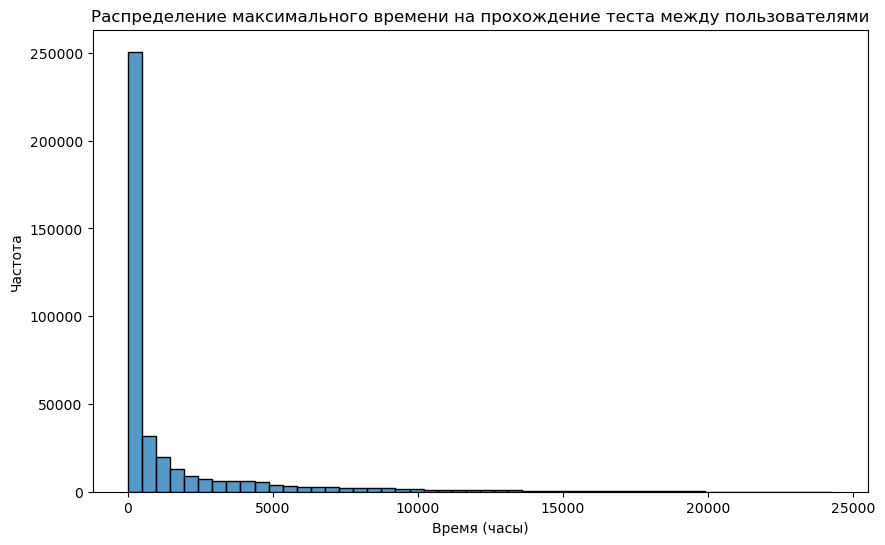

In [17]:
# Максимальное время на прохождение теста для каждого пользователя
max_time = train_df.groupby('user_id')['timestamp'].max()

# Распределение максимального времени на прохождение теста между пользователями
plt.figure(figsize=(10, 6))
sns.histplot(max_time.values / (1000 * 60 * 60), bins=50)
plt.title('Распределение максимального времени на прохождение теста между пользователями')
plt.xlabel('Время (часы)')
plt.ylabel('Частота')
plt.show()

Датасет содержит информаци о 393 656 уникальных пользователей, которые совершили 101 230 332 взаимодействий (ответов на вопросы или просмотров лекций).  В основном, взаимодействия представляют собой ответы на вопросы, а не просмотр лекций. При ответах на вопросы пользователи отвечают правильно примерно в 2/3 случаев. Чаще всего пользователи справляются с вопросами за период до 50 секунд и, как правило, используют подсказки. На прохождение всего теста большинству пользователей требуется несколько часов, хотя часть пользователей проводит на платформе гораздо больше времени.

### 2.2. QUESTIONS.CSV: МЕТАДАННЫЕ ДЛЯ ВОПРОСОВ, ПОСТАВЛЕННЫХ ПЕРЕД ПОЛЬЗОВАТЕЛЕМ

- **question_id**: внешний ключ для столбца `content_id` в `train/test`, когда тип контента — вопрос (0).
- **bundle_id**: код, обозначающий, какие вопросы отображаются вместе.
- **correct_answer**: правильный ответ на вопрос. Может быть использован для сравнения с ответом пользователя из `train`, чтобы проверить правильность.
- **part**: соответствующий раздел теста TOEIC.
- **tags**: один или несколько детализированных тегов для вопроса. Значения тегов не будут предоставлены, но эти коды достаточно для кластеризации вопросов.

In [18]:
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [19]:
questions_df.info()
questions_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [17]:
questions_df.isnull().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

Все столбцы датасета содержат числовые значения. При этом, в последнем столбцы числовые значения записаны в строку, поэтому столбец tags имеет типо object. Одна из строк имеет пропущенное значение в столбце tags. Учитывая. что пропуск единичный, оставим его как есть. 

#### Анализ распределения переменных

In [20]:
# Всего вопросов
print(len(questions_df['question_id'].unique()))
# Всего блоков с вопросами
print(len(questions_df['bundle_id'].unique()))
# Всего частей с вопросами
print(len(questions_df['part'].unique()))

13523
9765
7


In [21]:
# Поскольку блоков слишком много для визуализации, 
# Минимальное кол-во вопросов в блоке
print(questions_df.groupby('bundle_id')['question_id'].count().min())
# Максимальное кол-во вопросов в блоке
print(questions_df.groupby('bundle_id')['question_id'].count().max())
# Медианное кол-во вопросов в блоке
print(questions_df.groupby('bundle_id')['question_id'].count().median())

1
5
1.0


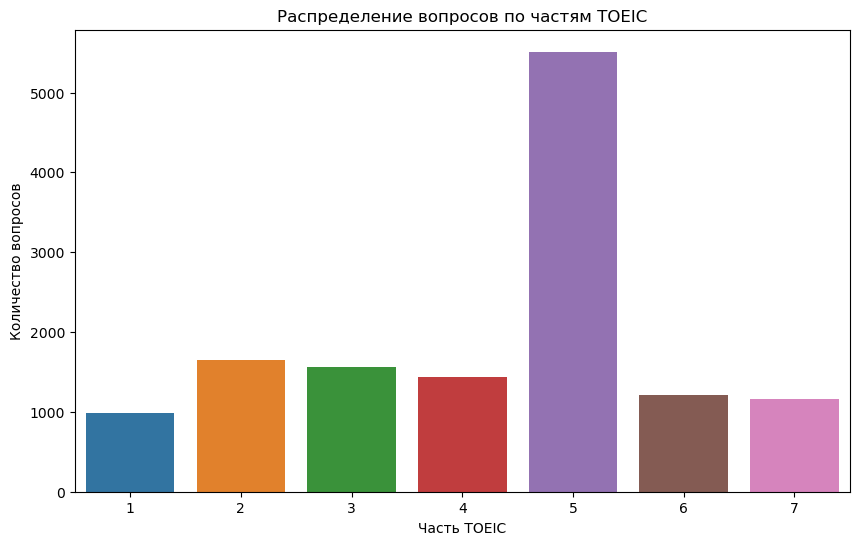

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='part', data=questions_df)
plt.title('Распределение вопросов по частям TOEIC')
plt.xlabel('Часть TOEIC')
plt.ylabel('Количество вопросов')
plt.show()

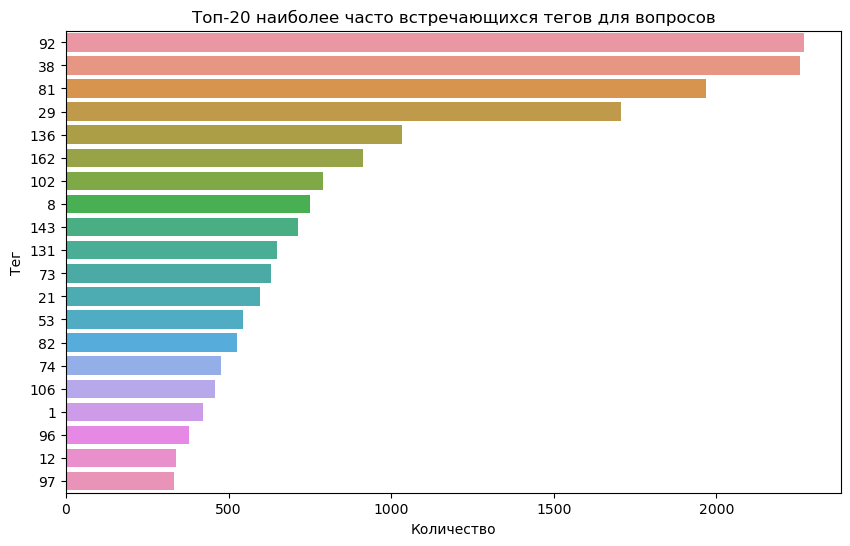

In [23]:
# Распределение тегов
top_tags = questions_df['tags'].str.split(' ').explode().value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title('Топ-20 наиболее часто встречающихся тегов для вопросов')
plt.xlabel('Количество')
plt.ylabel('Тег')
plt.show()

Всего в датасете 13 523 вопросов, которые поделены на 9 765 блоков (от 1 до 5 вопросов), которые, в свою очередь, поделены на 7 частей. Большая часть вопросов содержится в 5 блоке, следом за которым по убыванию следуют блоки: 2, 3, 4, 6, 7, 1. Среди тегов наиболее популярным является 92, за которыым следуют теги: 38, 81, 29, ...

### 2.3. LECTURES.CSV: МЕТАДАННЫЕ ДЛЯ ЛЕКЦИЙ, ПРОСМОТРЕННЫХ ПОЛЬЗОВАТЕЛЯМИ В ПРОЦЕССЕ ОБУЧЕНИЯ

- **lecture_id**: внешний ключ для столбца `content_id` в `train/test`, когда тип контента — лекция (1).
- **part**: код верхнего уровня категории лекции.
- **tag**: один тег для лекции. Значения тегов не будут предоставлены, но эти коды достаточно для кластеризации лекций.
- **type_of**: краткое описание основной цели лекции.


In [24]:
lectures_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [25]:
lectures_df.info()
lectures_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [26]:
lectures_df.isnull().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

Датасет содержит числовые значения и один столбцец со строковыми значениями (type_of). Пропусков нет. 

#### Анализ распределения переменных

In [28]:
# Всего лекций
print(len(lectures_df['lecture_id'].unique()))
# Всего тэгов с вопросами
print(len(lectures_df['tag'].unique()))
# Всего частей с вопросами
print(len(lectures_df['part'].unique()))
# Всего типов лекций и их наименование
print(len(lectures_df['type_of'].unique()))
print(lectures_df['type_of'].unique())


418
151
7
4
['concept' 'solving question' 'intention' 'starter']


In [29]:
# Поскольку блоков слишком много для визуализации, 
# Минимальное кол-во вопросов в тэге
print(lectures_df.groupby('tag')['lecture_id'].count().min())
# Максимальное кол-во вопросов в тэге
print(lectures_df.groupby('tag')['lecture_id'].count().max())
# Медианное кол-во вопросов в тэге
print(lectures_df.groupby('tag')['lecture_id'].count().median())

1
7
3.0


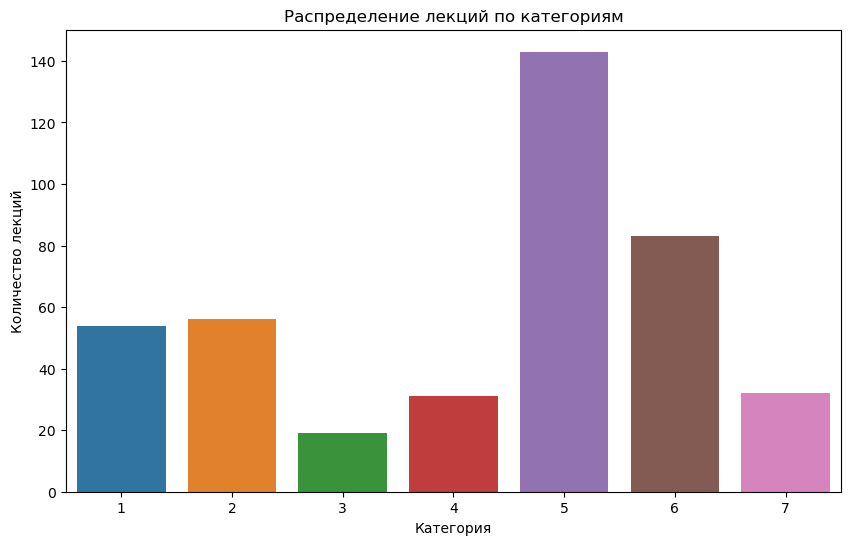

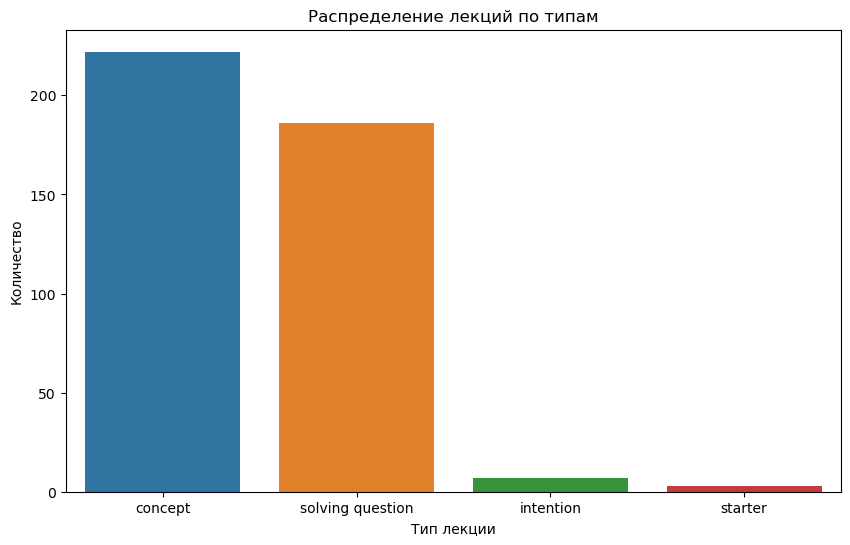

In [30]:
# Распределение лекций по категориям
plt.figure(figsize=(10, 6))
sns.countplot(x='part', data=lectures_df)
plt.title('Распределение лекций по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество лекций')
plt.show()

# Анализ типов лекций
lecture_types = lectures_df['type_of'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=lecture_types.index, y=lecture_types.values)
plt.title('Распределение лекций по типам')
plt.xlabel('Тип лекции')
plt.ylabel('Количество')
plt.show()

Датасет содержит 418 лекций, поделенных на 7 частей и 4 категории (concept, solving question, intention, starter), помеченных 151 теэгом (от 1 до 7 вопросов на тэг). Больше всего лекций в 5 части, за ней следуют в порядке убывания: 6, 2, 1, 7, 4, 3. 

## 3. Анализ взаимосвязей
### 3.1. Анализ сложных вопросов
Качество преподаваемого материала можно оценить посредством тестирования студентов. Вероятно, мы сможем найти какие-то закономерности, сравнив показатели сложных (т.е. таких, где большая часть студентов допускает ошибку) и обычных вопросов. Для анализа будем использовать только строки с вопросами.  
Поскольку 100% неправильных ответов может означать, что на вопрос ответил всего один человек и допустил ошибку, такие вопросы рассматривать не будем. Оставим только те вопросы, на которые ответило хотя бы 10 человек.

In [31]:
# Процент людей, которые неправильно ответили на каждый вопрос
incorrect_answer_percentage = train_df[train_df['content_type_id'] == 0] \
    .groupby('content_id')['answered_correctly'] \
    .apply(lambda x: (1 - x.mean()) * 100) \
    .sort_values(ascending=False)

# Кол-во  ответов
answer_count = train_df[train_df['content_type_id'] == 0] \
    .groupby('content_id')['user_id'] \
    .count() \
    .sort_values(ascending=False)

# Выводим результат
print(incorrect_answer_percentage.head(5))
print(answer_count.head(5))

# Выделяем вопросы, на который ответило как минимум 10 человек
frequent_questions_list = answer_count[answer_count >= 10].index

# Фильтруем список с процентов неверных ответов
filtered_incorrect_percentage = incorrect_answer_percentage[frequent_questions_list].sort_values(ascending=False)

# Оставляем только те, где процент как минимум 50
filtered_incorrect_percentage = filtered_incorrect_percentage[incorrect_answer_percentage >= 50]

# Список сложных вопросов
difficult_questions_list = filtered_incorrect_percentage.index

# Выводим результат
print(difficult_questions_list[:10])

content_id
1485     100.000000
1486     100.000000
10007    100.000000
1484     100.000000
10062     90.824825
Name: answered_correctly, dtype: float64
content_id
6116    213605
6173    202106
4120    199372
175     195861
7876    190170
Name: user_id, dtype: int64
Int64Index([10062, 7639, 3125, 9220, 7487, 10924, 10095, 2063, 10061, 6531], dtype='int64', name='content_id')


На следующем этапе поработаем со списком сложных вопросов. Определим долю сложных вопросов по датасету в целом и по каждой части, найдем наиболее популярные теги, проверим, к каким лекциям они относятся, а также оценим долю использованных подсказок и среднее время на ответ.

In [32]:
# Доля сложных вопросов:
difficult_questions_percent = questions_df[questions_df['question_id'].isin(difficult_questions_list)].shape[0] / \
    questions_df.shape[0] \
    * 100

print(difficult_questions_percent)

11.920431856836501


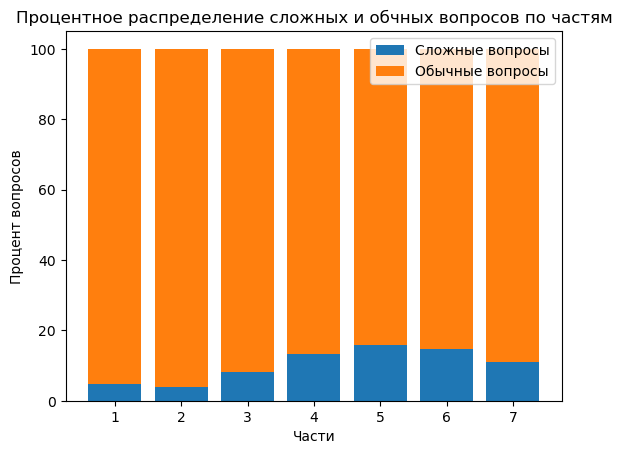

In [36]:
# Суммарное количество вопросов для каждой части
total_questions = questions_df.groupby('part')['question_id'].count()

# Вычисляем проценты
questions_difficult = (questions_df[questions_df['question_id'].isin(difficult_questions_list)] \
                .groupby('part')['question_id'] \
                .count() \
                / total_questions) * 100

questions_easy = (questions_df[~questions_df['question_id'].isin(difficult_questions_list)] \
           .groupby('part')['question_id'] \
           .count() \
           / total_questions) * 100

# Создаем массив с позициями для частей
x = np.arange(len(questions_df['part'].unique()))

# Построение графика
fig, ax = plt.subplots()

# Столбцы для сложных вопросов
bars_difficult = ax.bar(x, questions_difficult.values, label='Сложные вопросы')

# Столбцы для вопросов без затруднений
bars_easy = ax.bar(x, questions_easy.values, bottom=questions_difficult.values, label='Обычные вопросы')

# Настройки осей и меток
ax.set_xlabel('Части')
ax.set_ylabel('Процент вопросов')
ax.set_title('Процентное распределение сложных и обчных вопросов по частям')
ax.set_xticks(x)
ax.set_xticklabels(questions_df['part'].unique())
ax.legend()

plt.show()


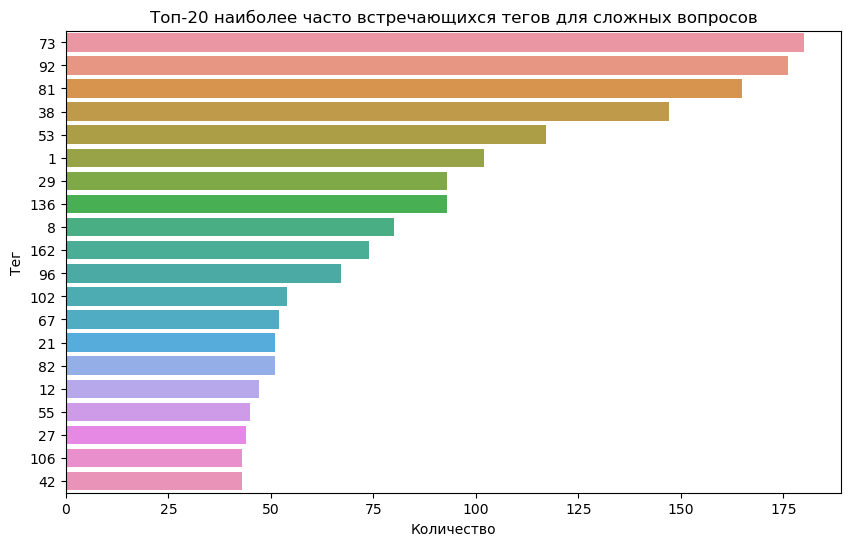

In [37]:
# Распределение тегов сложных вопросов
top_tags_difficult = questions_df[questions_df['question_id'].isin(difficult_questions_list)]['tags'] \
                .str.split(' ').explode().value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags_difficult.values, y=top_tags_difficult.index)
plt.title('Топ-20 наиболее часто встречающихся тегов для сложных вопросов')
plt.xlabel('Количество')
plt.ylabel('Тег')
plt.show()

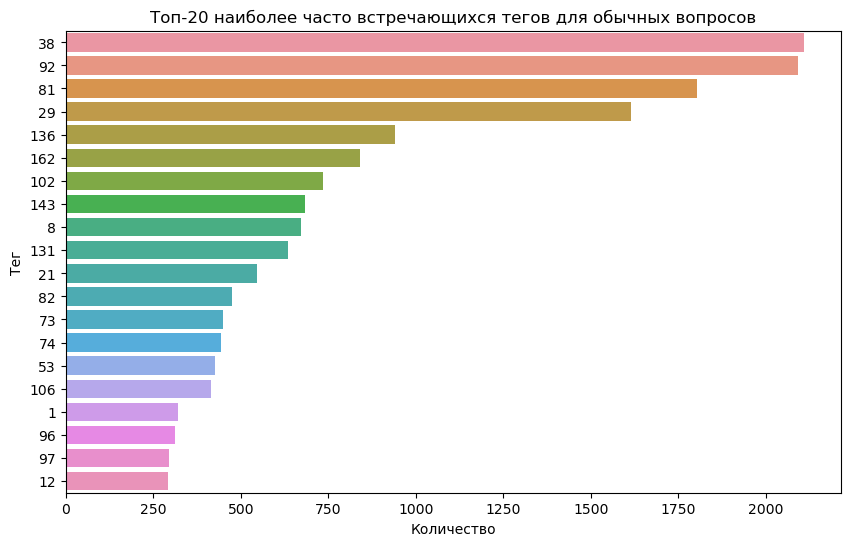

In [38]:
# Распределение тегов обычных вопросов
top_tags_easy = questions_df[~questions_df['question_id'].isin(difficult_questions_list)]['tags'] \
                .str.split(' ').explode().value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags_easy.values, y=top_tags_easy.index)
plt.title('Топ-20 наиболее часто встречающихся тегов для обычных вопросов')
plt.xlabel('Количество')
plt.ylabel('Тег')
plt.show()

In [39]:
# Количество топ-20 тегов для сложных вопросов, которые входят в топ-20 тегов для всех вопросов
print(len(set(top_tags.index) & set(top_tags_difficult.index)))

# Количество топ-20 тегов для обычных вопросов, которые входят в топ-20 тегов для всех вопросов
print(len(set(top_tags.index) & set(top_tags_easy.index)))

# Количество топ-20 тегов для обычных вопросов, которые входят в топ-20 тегов для сложных вопросов
print(len(set(top_tags_easy.index) & set(top_tags_difficult.index)))

# Множество тегов для вопросов, которые относятся только к сложным вопросам
important_tags_difficult = set(top_tags_difficult.index) - set(top_tags_easy.index)
important_tags_difficult = [int(item) for item in important_tags_difficult]

# Датасет с лекциями, которые содержат тег для сложных вопросов
bad_lectures = lectures_df[lectures_df['tag'].isin(important_tags_difficult)]

# Список плохих лекций
bad_lectures_list = lectures_df[lectures_df['tag'].isin(important_tags_difficult)].lecture_id.index

# Доля плохих лекций:
bad_lectures_percent = bad_lectures_list.shape[0] \
    / lectures_df.shape[0] \
    * 100

print(f'Всего плохих лекций: {len(bad_lectures_list)}')
print(f'Доля плохих лекций: {bad_lectures_percent}')

16
20
16
Всего плохих лекций: 13
Доля плохих лекций: 3.110047846889952


Множества с топ-20 тэгов для различных категорий вопросов сильно пересекаютс между собой. Для того, чтобы выделить наиболее сложные вопросы, для дальнейшего анализа будем использовать только те тэги, которые уникальны для множества сложных вопросов.

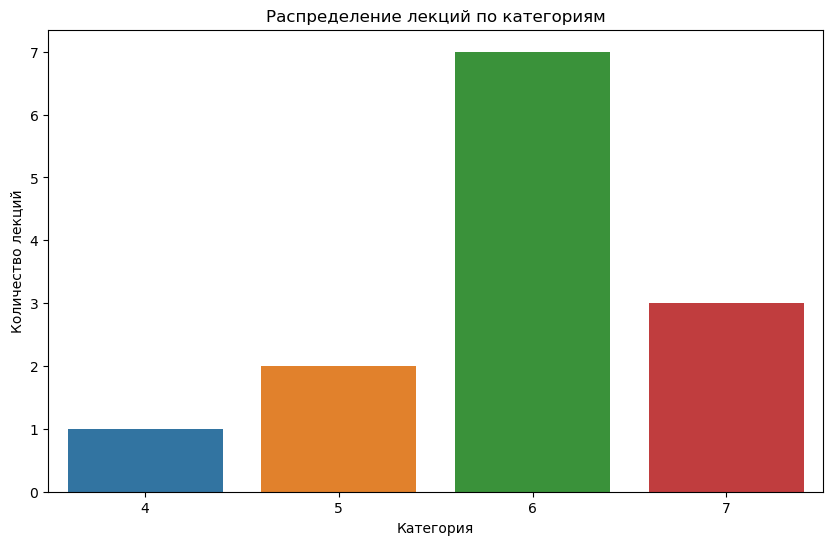

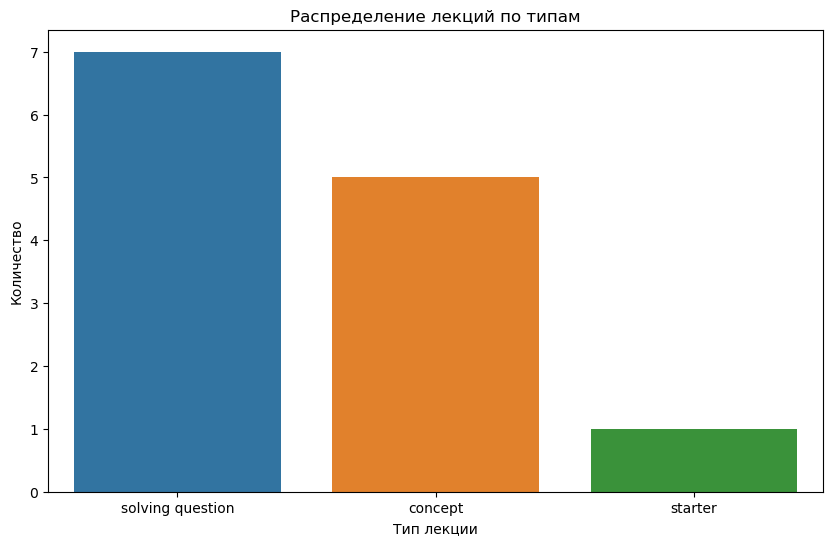

In [41]:
# Распределение лекций по категориям
plt.figure(figsize=(10, 6))
sns.countplot(x='part', data=bad_lectures)
plt.title('Распределение лекций по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество лекций')
plt.show()

# Анализ типов лекций
lecture_types = bad_lectures['type_of'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=lecture_types.index, y=lecture_types.values)
plt.title('Распределение лекций по типам')
plt.xlabel('Тип лекции')
plt.ylabel('Количество')
plt.show()

Теперь, когда мы получили список сложных вопросов, можно провести анализ показателей (prior_question_elapsed_time и prior_question_had_explanation) для каждой категории вопросов.  
Поскольку в исходном датасете указанные ранее показатели принадлежат предыдущей группе вопросов, необходимо сдвинуть их на -1 по отношению к столбцу task_container_id.  
Заметим также, что для некоторых пользователей значения в столбце task_container_id идут не по порядку. Для таких пользователей сдвиг на -1 будет искажать данные, поэтому перед анализом уберем из датасета.

In [42]:
# Функция для проверки, что task_container_id идут в возрастающем порядке
def is_non_decreasing(task_ids):
    return all(x <= y for x, y in zip(task_ids, task_ids[1:]))

# Группируем по user_id и проверяем, идут ли task_container_id в возрастающем порядке
valid_users = train_df.groupby('user_id')['task_container_id'].apply(is_non_decreasing).reset_index()

# Оставляем только пользователей, у которых task_container_id идут в возрастающем порядке
valid_users = valid_users[valid_users['task_container_id'] == True]['user_id']

# Фильтруем оригинальный df
train_df_filtered = train_df[train_df['user_id'].isin(valid_users)]

# Находим первое значение для каждого task_container_id внутри каждого пользователя
block_data = train_df_filtered.groupby(['user_id', 'task_container_id']).first().reset_index()

# Сдвигаем значения на один блок назад для каждого пользователя
block_data['prior_question_elapsed_time_shifted'] = \
                block_data.groupby('user_id')['prior_question_elapsed_time'].shift(-1)
block_data['prior_question_had_explanation_shifted'] = \
                block_data.groupby('user_id')['prior_question_had_explanation'].shift(-1)

# Объединяем сдвинутые значения с исходым df
train_df_filtered = pd.merge(train_df_filtered, block_data[['user_id', \
                                                            'task_container_id', \
                                                            'prior_question_elapsed_time_shifted', \
                                                            'prior_question_had_explanation_shifted']],
                             on=['user_id', 'task_container_id'], how='left')

# Выводим
train_df_filtered.head(10)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,prior_question_elapsed_time_shifted,prior_question_had_explanation_shifted
0,0,124,7900,0,0,0,1,NaN,NaN,26000.0,False
1,32683,124,7876,0,1,0,0,26000.0,False,29000.0,False
2,62000,124,175,0,2,2,1,29000.0,False,26000.0,False
3,83632,124,1278,0,3,1,0,26000.0,False,18000.0,False
4,189483,124,2064,0,4,2,0,18000.0,False,33333.0,False
5,189483,124,2063,0,4,3,0,18000.0,False,33333.0,False
6,189483,124,2065,0,4,2,1,18000.0,False,33333.0,False
7,258793,124,3364,0,5,2,0,33333.0,False,21000.0,False
8,258793,124,3365,0,5,3,0,33333.0,False,21000.0,False
9,258793,124,3363,0,5,0,0,33333.0,False,21000.0,False


In [43]:
train_df_questions_filtered = train_df_filtered[train_df_filtered['content_type_id'] == 0]

# Среднее время в секундах, которое потребовалось для ответа на сложный вопрос
print(train_df_questions_filtered[train_df_questions_filtered['content_id'].isin(difficult_questions_list)] \
    ['prior_question_elapsed_time_shifted'].mean() \
     / 1000)

# Среднее время в секундах, которое потребовалось для ответа на обычный вопрос
print(train_df_questions_filtered[~train_df_questions_filtered['content_id'].isin(difficult_questions_list)] \
    ['prior_question_elapsed_time_shifted'].mean() \
     / 1000)

# Процент использованных подсказок при ответах на сложные вопросы
print(train_df_questions_filtered[train_df_questions_filtered['content_id'].isin(difficult_questions_list)] \
    ['prior_question_had_explanation_shifted'].sum() \
     / train_df_questions_filtered[train_df_questions_filtered['content_id'].isin(difficult_questions_list)] \
    ['prior_question_had_explanation_shifted'].count() \
     * 100)

# Процент использованных подсказок при ответах на обычные вопросы
print(train_df_questions_filtered[~train_df_questions_filtered['content_id'].isin(difficult_questions_list)] \
    ['prior_question_had_explanation_shifted'].sum() \
     / train_df_questions_filtered[~train_df_questions_filtered['content_id'].isin(difficult_questions_list)] \
    ['prior_question_had_explanation_shifted'].count() \
     *100)

25.411230611200292
23.875815102090396
30.102209280735114
68.2393826577818


Таким образом, время ответа на сложные вопросы незначительно превосходит время ответа на обычные вопросы. При этом, при ответе на сложные вопросы пользователи намного реже берут подсказки.  
  
Проведем анализ того, как просмотр лекций влияет на успеваемость.

In [44]:
# Список пользователей
user_list = train_df[train_df['content_id'] \
                .isin(difficult_questions_list)].user_id.unique()

# Список пользователей, которые не смотрели лекции
user_list_without_lectures = set(user_list) - set(train_df[train_df['content_type_id'] == 1].user_id)

# Список пользователей, которые смотрят лекции
user_list_with_lectures = set(user_list) - set(user_list_without_lectures)

# Сначала фильтруем данные по user_id
train_df_user_without_lectures = train_df[train_df['user_id'].isin(user_list_without_lectures)]
train_df_user_with_lectures = train_df[train_df['user_id'].isin(user_list_with_lectures)]

# Затем группируем и выполняем нужные операции
user_without_lectures_group = \
                train_df_user_without_lectures.groupby('user_id')['prior_question_had_explanation'] \
                .agg(['sum', 'count'])

user_with_lectures_group = \
                train_df_user_with_lectures.groupby('user_id')['prior_question_had_explanation'] \
                .agg(['sum', 'count'])

# Расчет среднего отношения использования подсказок 
user_without_lectures_result = \
                (user_without_lectures_group[user_without_lectures_group['count'] > 0]['sum'] \
                / user_without_lectures_group[user_without_lectures_group['count'] > 0]['count']) \
                .mean() * 100

user_with_lectures_result = \
                (user_with_lectures_group[user_with_lectures_group['count'] > 0]['sum'] \
                / user_with_lectures_group[user_with_lectures_group['count'] > 0]['count']) \
                .mean() * 100

# Вывод результата
print(f'Средний процент использования подсказок среди пользователей, игнорирующих лекции: {user_without_lectures_result}')
print(f'Средний процент использования подсказок среди пользователей, просматривающих лекции: {user_with_lectures_result}')
print('----------')

# Группировка по столбцу answered_correctly
user_without_lectures_group = \
                train_df_user_without_lectures.groupby('user_id')['answered_correctly'] \
                .agg(['sum', 'count'])

user_with_lectures_group = train_df_user_with_lectures[train_df_user_with_lectures['content_type_id'] == 0] \
                .groupby('user_id')['answered_correctly'] \
                .agg(['sum', 'count'])


user_without_lectures_result = \
                (user_without_lectures_group[user_without_lectures_group['count'] > 0]['sum'] \
                / user_without_lectures_group[user_without_lectures_group['count'] > 0]['count']) \
                .mean() * 100

user_with_lectures_result = \
                (user_with_lectures_group[user_with_lectures_group['count'] > 0]['sum'] \
                / user_with_lectures_group[user_with_lectures_group['count'] > 0]['count']) \
                .mean() * 100

# Вывод результата
print(f'Средний процент правильных ответов подсказок среди пользователей, игнорирующих лекции: {user_without_lectures_result}')
print(f'Средний процент правильных ответов среди пользователей, просматривающих лекции: {user_with_lectures_result}')

Средний процент использования подсказок среди пользователей, игнорирующих лекции: 37.291194256518914
Средний процент использования подсказок среди пользователей, просматривающих лекции: 85.76245359528268
----------
Средний процент правильных ответов подсказок среди пользователей, игнорирующих лекции: 50.37571888753828
Средний процент правильных ответов среди пользователей, просматривающих лекции: 61.35896285879156


Пользователи, которые не смотрят лекции, значительно реже использую подсказки. В то же время, эти пользователи хуже справляются с заданиями. 

## 4. Вывод

Несмотря на то, что большинство студентов отвечают на вопросы корректно, нам удалось идентифицировать 11.92% сложных вопросов (таких, на которые более половины студентов отвечают некорректно). Большинство таких вопросов содержатся в 5 части, за ней следуют в порядке убывания: 6, 4, 7, 3, 1, 2. На основании тэгов нам удалось идентифицировать 13 лекций, которые требуют доработки (больше всего в 6 части, за ней следуют 7, 5, 4). 

Тем не менее, анализ времени ответа на вопросы показывает, что пользователи отвечают на сложные и обычные вопросы практически за одно и то же время. При этом, отвечая на сложные вопросы, пользователи реже берут подсказки. Это может говорить о том, что проблема не в сложности вопроса, а в самоуверенности пользователя. 

Говоря о самоуверенности пользователей, стоит сравнить тех, кто смотрит хотя бы часть лекций, с теми, кто не смотрит их вообще. Так, анализ показал, что пользователи, просматривающие лекции, лучше отвечают и чаще пользуются подсказками. 

Таким образом, можно предположить, что существует категория пользователей, которая пропускает лекции и игнорируюет подсказки, из-за чего справляется с заданиями хуже. Вероятно, требуется доработать лекции и сделать их более информативными, а также донести до пользователей важность ознакомления с ними. 